### Generación de números aleatorios

In [1]:
import numpy as np
from numpy.random import Generator, PCG64

np.random.seed(1729)
rng = Generator(PCG64())
rng.random()

0.9000273730257627

In [2]:
(0 + 3) * rng.random() - 3

-0.8286282006850128

In [3]:
rng.random((2,3))

array([[0.65059468, 0.96076472, 0.5634431 ],
       [0.75887512, 0.7184905 , 0.8458265 ]])

In [4]:
rng.integers(low=10, high=20, size=5, endpoint=True)

array([16, 12, 14, 16, 18])

### Generación de muestras aleatorias

In [5]:
dado = np.arange(6) + 1
dado

array([1, 2, 3, 4, 5, 6])

In [6]:
rng.choice(dado, (5, 3), replace=True)

array([[1, 2, 4],
       [3, 3, 5],
       [4, 6, 4],
       [3, 5, 2],
       [5, 6, 1]])

In [7]:
pesos = np.array([3/20, 3/20, 3/20, 1/4, 3/20, 3/20])
pesos.sum()

1.0

In [8]:
rng.choice(dado, (5,3), p=pesos, replace=True)

array([[5, 3, 2],
       [3, 4, 4],
       [2, 4, 5],
       [3, 3, 2],
       [1, 4, 5]])

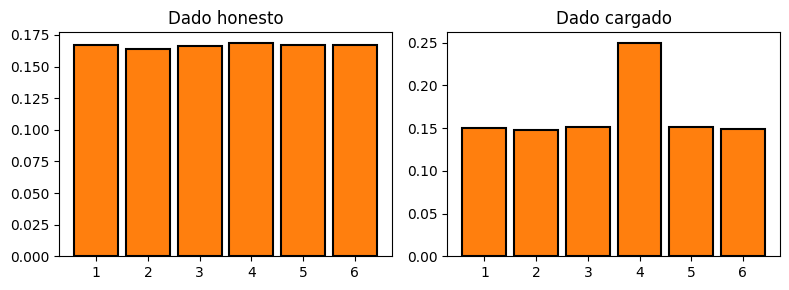

In [9]:
import matplotlib.pyplot as plt

num_lanzamientos = 100000 # Cantidad de veces que seleccionamos una cara del dado
dado_honesto = rng.choice(dado, num_lanzamientos, replace=True)
dado_cargado = rng.choice(dado, num_lanzamientos, p=pesos, replace=True)
bins = [1, 2, 3, 4, 5, 6, 7] # Bins para construir el histograma

fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].hist(dado_honesto, bins=bins, density=True, align='left', rwidth=0.85, ec='black', 
           fc='tab:orange', linewidth=1.5)
ax[0].set_title("Dado honesto")
ax[0].set_xticks(bins[:-1])
ax[1].hist(dado_cargado, bins=bins, density=True, align='left', rwidth=0.85, ec='black', 
           fc='tab:orange', linewidth=1.5)
ax[1].set_title("Dado cargado")
ax[1].set_xticks(bins[:-1])
plt.tight_layout()
plt.show()

### Reordenamiento y permutación

In [10]:
array = np.arange(10)
rng.shuffle(array)
array

array([2, 8, 1, 5, 7, 4, 0, 6, 9, 3])

In [11]:
rng.permutation([1, 2, 3, 4, 5])

array([3, 2, 1, 5, 4])

In [12]:
rng.permutation(10)

array([1, 5, 2, 3, 4, 8, 9, 7, 0, 6])

In [13]:
x = np.arange(0, 12).reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
y = rng.permutation(x, axis=1)
y

array([[ 1,  0,  2,  3],
       [ 5,  4,  6,  7],
       [ 9,  8, 10, 11]])

In [15]:
z = rng.permutation(x, axis=0)
z

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3]])

### Distribuciones de probabilidad

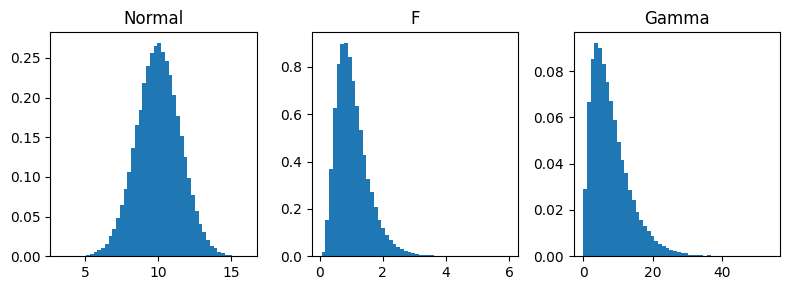

In [16]:
n_samples = 100000
rng_dist = np.random.default_rng(7)
X_normal = rng_dist.normal(10, 1.5, size=n_samples)
X_f = rng_dist.f(10, 50, size=n_samples)
X_gamma = rng_dist.gamma(2, 4, size=n_samples)
dists = [X_normal, X_f, X_gamma]
n_dists = ['Normal', 'F', 'Gamma']

fig, ax = plt.subplots(1,3, figsize=(8,3))
n_bins = 50
for i in range(len(dists)):
    ax[i].hist(dists[i], bins=n_bins, density=True)
    ax[i].set_title(n_dists[i])
plt.tight_layout()
plt.show()

#### Media

In [17]:
X_normal.mean(), X_f.mean(), X_gamma.mean()

(9.998010521368922, 1.039862209298918, 8.001001879189166)

In [18]:
X_normal_Nan = np.hstack((X_normal, np.nan))
X_normal_Nan.mean()

nan

In [19]:
np.nanmean(X_normal_Nan)

9.998010521368922

#### Mediana

In [20]:
valores_par = np.arange(10)
valores_impar = np.arange(11)
print(f'Mediana par: {np.median(valores_par)} | Mediana impar: {np.median(valores_impar)}')
print(f'  Media par: {valores_par.mean()} | Media impar: {valores_impar.mean()}')

Mediana par: 4.5 | Mediana impar: 5.0
  Media par: 4.5 | Media impar: 5.0


In [21]:
print(f'  Media Normal: {X_normal.mean()}')
print(f'Mediana Normal: {np.median(X_normal)}')
print(f'  Media F: {X_f.mean()}')
print(f'Mediana F: {np.median(X_f)}')

  Media Normal: 9.998010521368922
Mediana Normal: 9.996573186158033
  Media F: 1.039862209298918
Mediana F: 0.9448978239181103


#### Moda

In [22]:
from scipy import stats

samples = rng.choice(dado, (5, 4), p=pesos, replace=True)
print(samples) # Salida del experimento
print(stats.mode(samples)) # Por defecto axis=0 (conteo por columnas) 
print(stats.mode(samples, axis=None)) # Todos los datos

[[4 1 4 5]
 [5 6 2 4]
 [3 6 4 1]
 [4 6 1 2]
 [3 5 3 6]]
ModeResult(mode=array([3, 6, 4, 1]), count=array([2, 3, 2, 1]))
ModeResult(mode=4, count=5)


#### Media geométrica

In [23]:
print(f'      Media F: {X_f.mean()}')
print(f'    Mediana F: {np.median(X_f)}')
print(f'Media geom. F: {stats.gmean(X_f)}')
print(f'       Moda F: {stats.mode(X_f)}')

      Media F: 1.039862209298918
    Mediana F: 0.9448978239181103
Media geom. F: 0.9189045833992728
       Moda F: ModeResult(mode=0.05411090116941826, count=1)


#### Rango

In [24]:
for name, distribucion in zip(n_dists, dists):
    print(f'Rango de {name}: {np.ptp(distribucion)}')

Rango de Normal: 12.845742827626554
Rango de F: 5.944760304157928
Rango de Gamma: 53.84036147711152


#### Cuantiles

In [25]:
IQR = stats.iqr(X_gamma)
p25 = stats.iqr(X_gamma, rng=(0, 25)) # Percentil 25
p50 = stats.iqr(X_gamma, rng=(0, 50)) # Percentil 50
p75 = stats.iqr(X_gamma, rng=(0, 75)) # Percentil 75
ptp = stats.iqr(X_gamma, rng=(0, 100))  # rango
print(f'{      IQR = } \np75 - p25 = {p75 - p25} \nmediana = {p50} \n {   ptp = }')

      IQR = 6.916758838426253 
p75 - p25 = 6.916758838426253 
mediana = 6.721041139175036 
    ptp = 53.84036147711152


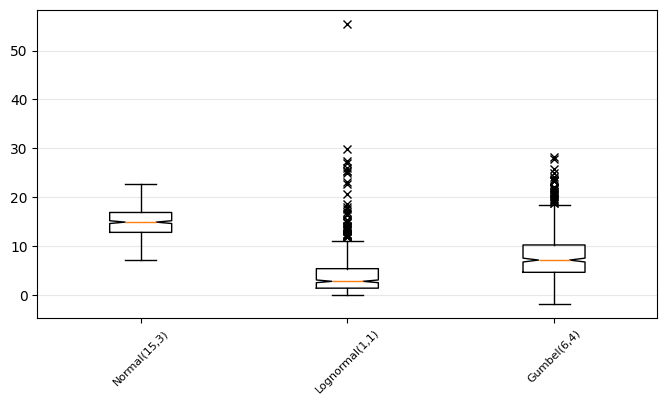

In [26]:
n2_samples = 500 # Número de muestras

# Tomamos muestras de tres distribuciones
X2_normal = rng_dist.normal(15, 3, size=n2_samples)
X2_logn = rng_dist.lognormal(1, 1, size=n2_samples)
X2_gumb = rng_dist.gumbel(6, 4, size=n2_samples)
dists_2 = [X2_normal, X2_logn, X2_gumb]
nombres_dist = ['Normal(15,3)', 'Lognormal(1,1)', 'Gumbel(6,4)']

fig2, ax2 = plt.subplots(figsize=(8,4))
bp = plt.boxplot(dists_2, notch=True, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], marker='x')

# Trazamos una grilla horizontal de color tenue para no distraer
# la lectura de los datos.
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Etiquetamos los boxplots
xtickNames = plt.setp(ax2, xticklabels=nombres_dist)
plt.setp(xtickNames, rotation=45, fontsize=8)
plt.show()

#### Varianza y desviación estándar

In [27]:
# Varianza y desviación estándar poblacional
var = np.var(X2_normal)
std = np.std(X2_normal)
print(f'σ² = {var}, σ = {std}')

σ² = 7.6544508825934985, σ = 2.7666678301873353


In [28]:
# Varianza y desviación estándar muestral
var_m = np.var(X2_normal, ddof=1)
std_m = np.std(X2_normal, ddof=1)
print(f's²(m) = {var_m}, s(m) = {std_m}')

s²(m) = 7.669790463520539, s(m) = 2.7694386549480634


#### Error estándar

Media de medias: 4.970356897826361
Error estándar de la media: 0.013853918499575835


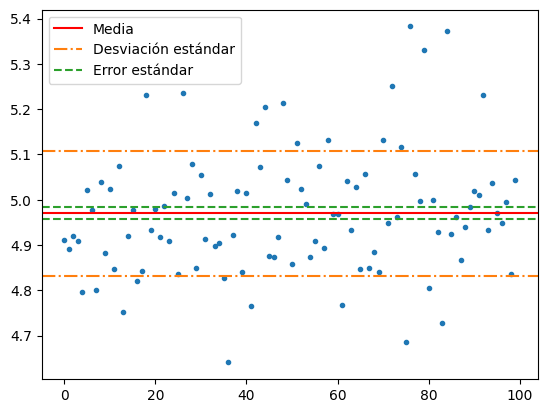

In [29]:
from math import sqrt

rv = stats.norm(5, 1)

n_muestras = 100
n_valores = 60
medias = np.zeros(n_muestras)
for i in range(n_muestras):
    sample = rv.rvs(n_valores)
    medias[i] = sample.mean()
media = medias.mean()
std = medias.std()
EEM = np.std(medias, ddof=1) / sqrt(n_muestras)
print(f'Media de medias: {media}')
print(f'Error estándar de la media: {EEM}')
plt.plot(medias, '.')
plt.axhline(y = media, color='red', label='Media')
plt.axhline(y = media - std, color='tab:orange', linestyle='dashdot', label='Desviación estándar')
plt.axhline(y = media + std, color='tab:orange', linestyle='dashdot')
plt.axhline(y = media - EEM, color='tab:green', linestyle='--', label='Error estándar')
plt.axhline(y = media + EEM, color='tab:green', linestyle='--')
plt.legend()
plt.show()

In [30]:
stats.sem(medias)

0.013853918499575835

#### Intervalos de confianza

In [31]:
print(stats.norm.interval(.95, np.mean(medias), scale=stats.sem(medias)))

(4.943203716522439, 4.997510079130282)


In [32]:
print(stats.t.interval(.95, np.mean(medias), scale=stats.sem(medias)))

(-0.03567660913926219, 0.03567660913926219)


### Test de hipótesis

#### Ejemplo de comparación de media de una muestra

In [33]:
mu_0, mu, sigma = 2.0, 1.82, 0.5
X = stats.norm(mu, sigma)
n = 100
X_muestra = X.rvs(n)

In [34]:
Z = (X_muestra.mean() - mu_0) / (sigma / np.sqrt(n))
Z

-2.720519876366154

In [35]:
t = (X_muestra.mean() - mu_0) / (X_muestra.std(ddof=1) / np.sqrt(n))
t

-2.7205218379193887

In [36]:
valor_critico = stats.norm().ppf(0.025)
valor_critico

-1.9599639845400545

In [37]:
p_valor_n = 2 * stats.norm().cdf(-abs(Z))
p_valor_t = 2 * stats.t(df=(n-1)).cdf(-abs(t))
p_valor_n, p_valor_t

(0.0065179353263593535, 0.007700231797543923)

In [38]:
e, p = stats.ttest_1samp(X_muestra, mu_0)
e, p

(-2.7205218379193883, 0.00770023179754393)

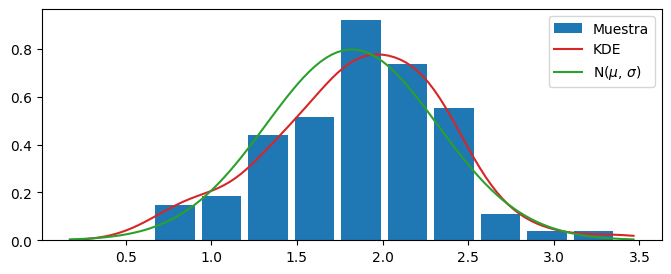

In [39]:
from scipy.stats import gaussian_kde
fig, ax = plt.subplots(figsize=(8,3))
ax.hist(X_muestra, density=True, rwidth=0.85, label='Muestra')
kde = gaussian_kde(X_muestra)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, kde(x), color='tab:red', label='KDE')
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x), color='tab:green', label=r'N($\mu$, $\sigma$)')
ax.legend()
plt.show()

#### Ejemplo de comparación de medias de dos muestras

In [40]:
n, sigma = 30, 1.0
mu_1, mu_2 = np.random.random(2)
X_1 = stats.norm(mu_1, sigma)
X_2 = stats.norm(mu_2, sigma)
X_1_muestra = X_1.rvs(n)
X_2_muestra = X_2.rvs(n)

In [41]:
t, p = stats.ttest_ind(X_1_muestra, X_2_muestra)
t, p

(-1.2353053231429025, 0.2216974276096801)

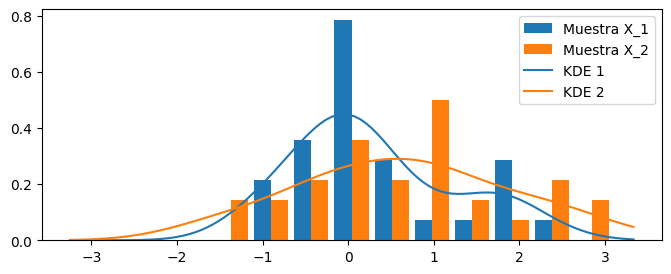

In [42]:
fig, ax = plt.subplots(figsize=(8,3))
ax.hist([X_1_muestra, X_2_muestra], density=True, rwidth=0.85, label=['Muestra X_1', 'Muestra X_2'])
kde_1 = gaussian_kde(X_1_muestra)
kde_2 = gaussian_kde(X_2_muestra)
x = np.linspace(*X_1.interval(0.999), num=100)
ax.plot(x, kde_1(x), color='tab:blue', label='KDE 1')
ax.plot(x, kde_2(x), color='tab:orange', label='KDE 2')
ax.legend()
plt.show()

In [43]:
mu_1, mu_2

(0.04154576848611169, 0.4911986914774764)

#### ANOVA unidireccional

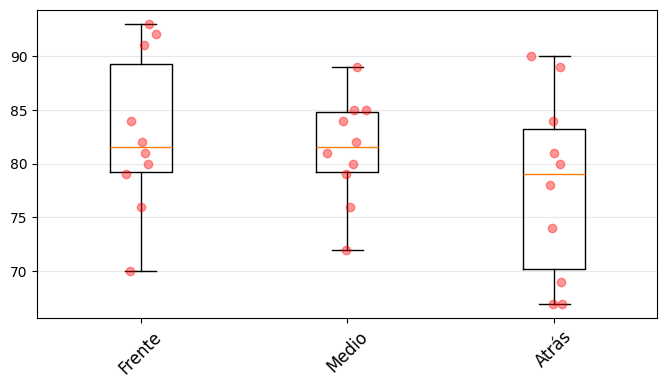

In [44]:
frente = [92, 79, 70, 76, 91, 80, 93, 82, 81, 84]
medio = [80, 84, 76, 72, 85, 79, 81, 85, 82, 89]
atras = [74, 67, 81, 78, 69, 80, 89, 84, 90, 67]
grupos = [frente, medio, atras]
nombres_grupos = ['Frente', 'Medio', 'Atrás']

fig, ax = plt.subplots(figsize=(8,4))
bp = plt.boxplot(grupos, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
    
for i, g in enumerate(grupos):
    x = np.random.normal(i + 1, 0.05, size=len(g))
    plt.plot(x, g, 'ro', alpha=0.4)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Etiquetamos los boxplots
xtickNames = plt.setp(ax, xticklabels=nombres_grupos)
plt.setp(xtickNames, rotation=45, fontsize=12)
plt.show()

In [45]:
from scipy.stats import f_oneway
f_oneway(frente, medio, atras)

F_onewayResult(statistic=1.2490092470277412, pvalue=0.30283594892105703)

### Kernel denstity estimation (KDE)

In [46]:
def k_gauss(x, xi, h):
    return np.exp(-(x-xi)**2/(2*h**2))
    
def hacer_figura(datos, kde, n_bins, plot_kernels=True):
    """Función que grafica un histograma de los datos y el KDE asociado,
    junto con las funciones gaussianas de cada valor y un rug plot."""
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(datos, bins=n_bins, density=True, alpha=0.35)
    x_c = np.linspace(datos.min(), datos.max(), num=200)
    ax.plot(datos, np.full_like(datos, -0.05), 'k|', markeredgewidth=1.0, alpha=0.5)
    ax.plot(x_c, kde(x_c), color='tab:red', label='KDE')
    if plot_kernels:
        for x_i in datos:
            ax.plot(x_c, k_gauss(x_c, x_i, h), color='k', alpha=0.25)

    ax.set_xlabel(r'$x$') 
    ax.set_ylabel(r'PDF($x$)')    
    plt.show()

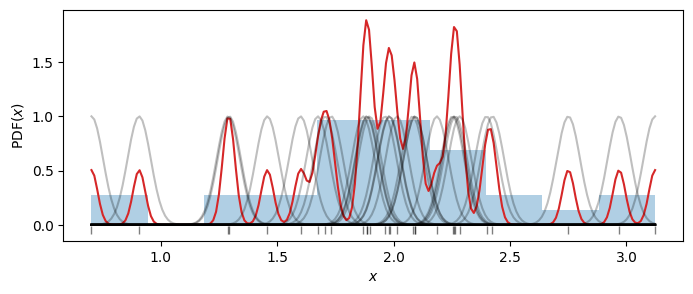

In [47]:
n_chico = 30
X_chica = X.rvs(n_chico)
h = 0.05
kde_c = gaussian_kde(X_chica, bw_method=h)
hacer_figura(X_chica, kde_c, 10)

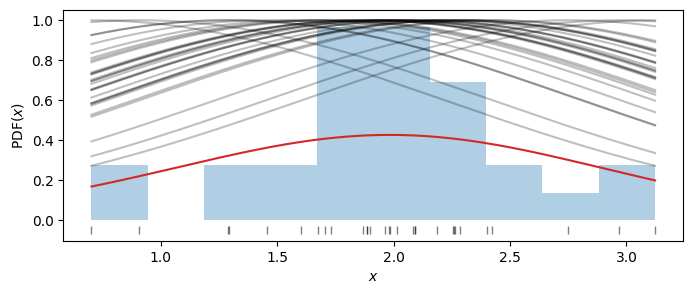

In [48]:
h = 1.5
kde_c = gaussian_kde(X_chica, bw_method=h)
hacer_figura(X_chica, kde_c, 10)

ancho de banda: 0.5364923039998837


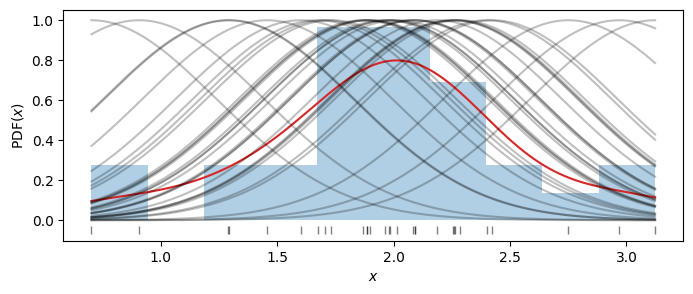

In [49]:
kde_c = gaussian_kde(X_chica, bw_method='silverman')
h = kde_c.factor
print(f'ancho de banda: {h}')
hacer_figura(X_chica, kde_c, 10)

In [50]:
n = 1000
X_1 = stats.norm(2.5, 0.5)
X_muestra = X.rvs(n)
X_muestra[int(0.3 * n):] += 2

Ancho de banda: 0.251188643150958


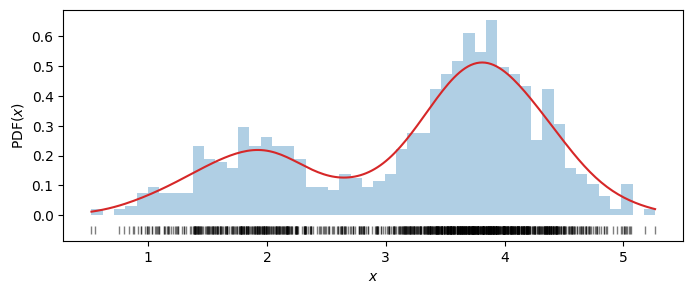

In [51]:
kde = gaussian_kde(X_muestra)
print(f'Ancho de banda: {kde.factor}')
hacer_figura(X_muestra, kde, 50, plot_kernels=False)


### Copyright 2020-2024 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

